In [38]:
import requests
from nsepy import *
from datetime import date
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

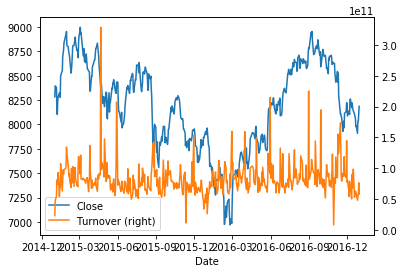

In [39]:
nifty = get_history(symbol="NIFTY", 
                    start=date(2015,1,1), 
                    end=date(2016,12,31),
                    index=True)
nifty[['Close', 'Turnover']].plot(secondary_y='Turnover')


In [41]:
nifty.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10


# Part 1 :

### 1. Create 4,16,....,52 week moving average(closing price) for each stock and index. This should happen through a function

In [42]:
def plotMovingAverage(dataframe,window,trend=False):
    mvg_avg = dataframe.rolling(window=window).mean()
    plt.figure(figsize=(15,8))
    plt.title('Moving Average With Window Size = {}'.format(window))
    plt.plot(mvg_avg,label='Moving Average Trend')
    plt.grid(True)
    
    if trend:
        trend4 = dataframe.rolling(4).mean()
        trend16 = dataframe.rolling(16).mean()
        trend36 = dataframe.rolling(36).mean()
        trend52 = dataframe.rolling(52).mean()
        plt.figure(figsize=(16,10))
        plt.xticks(rotation=90)
        plt.plot(trend4,color='red',label='4 day Mov Avg.')
        plt.plot(trend16,color='yellow',label='16 day Mov Avg.')
        plt.plot(trend36,color='green',label='36 day Mov Avg.')
        plt.plot(trend52,color='cyan',label='52 day Mov Avg.')
        
    plt.legend(loc='best')
    plt.grid(True)
        

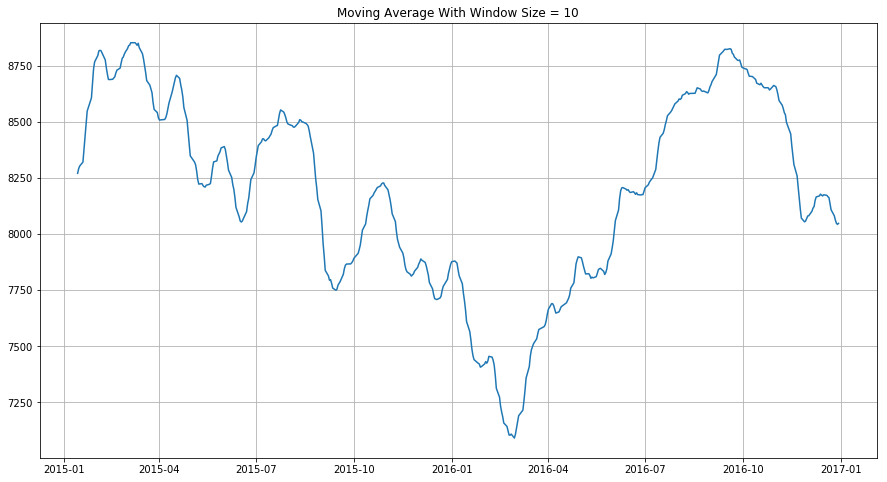

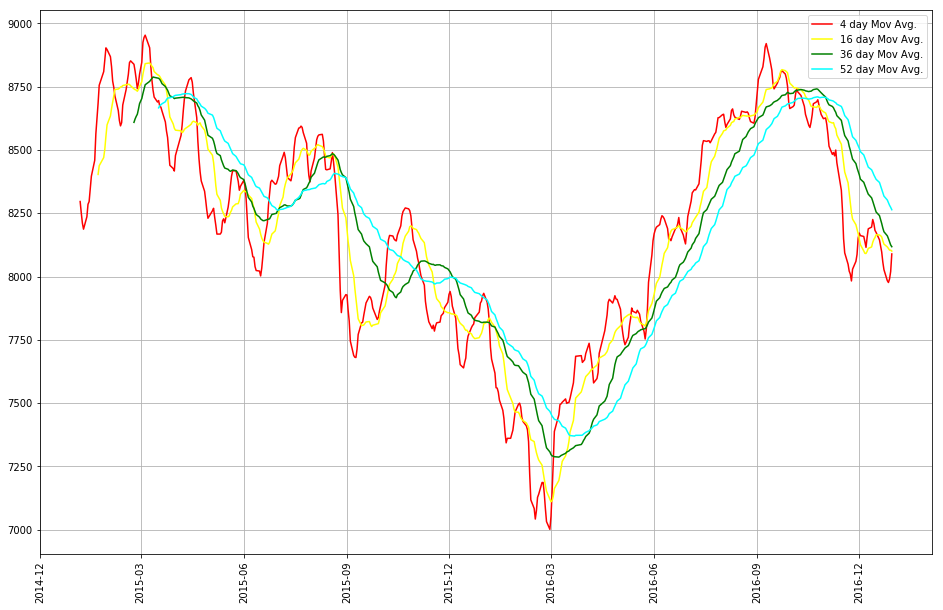

In [43]:
plotMovingAverage(nifty['Close'],10,trend=True)

### 2. Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 75 and see how the data looks like. Remember they will create stress on your laptop RAM load.

In [44]:
def plot_rolling_window(dataframe, win = [10, 75]):
    
    temp = pd.DataFrame()
    
    temp['Close'] = dataframe['Close']
     
    for i in range(len(win)):
        mvg_avg = temp['Close'].rolling(win[i]).mean()
        temp[" Mov.AVG for " + str(win[i])+ " Roll Window"] = mvg_avg
        print('Calculated Moving Averages: for {0} weeks: \n\n {1}' .format(win[i], temp['Close']))
    temp.plot(title="Moving Averages for {} \n\n" .format(dataframe.Close))

Calculated Moving Averages: for 10 weeks: 

 Date
2015-01-01    8284.00
2015-01-02    8395.45
2015-01-05    8378.40
2015-01-06    8127.35
2015-01-07    8102.10
2015-01-08    8234.60
2015-01-09    8284.50
2015-01-12    8323.00
2015-01-13    8299.40
2015-01-14    8277.55
2015-01-15    8494.15
2015-01-16    8513.80
2015-01-19    8550.70
2015-01-20    8695.60
2015-01-21    8729.50
2015-01-22    8761.40
2015-01-23    8835.60
2015-01-27    8910.50
2015-01-28    8914.30
2015-01-29    8952.35
2015-01-30    8808.90
2015-02-02    8797.40
2015-02-03    8756.55
2015-02-04    8723.70
2015-02-05    8711.70
2015-02-06    8661.05
2015-02-09    8526.35
2015-02-10    8565.55
2015-02-11    8627.40
2015-02-12    8711.55
               ...   
2016-11-21    7929.10
2016-11-22    8002.30
2016-11-23    8033.30
2016-11-24    7965.50
2016-11-25    8114.30
2016-11-28    8126.90
2016-11-29    8142.15
2016-11-30    8224.50
2016-12-01    8192.90
2016-12-02    8086.80
2016-12-05    8128.75
2016-12-06    8143.15
2016

AttributeError: 'NoneType' object has no attribute 'head'

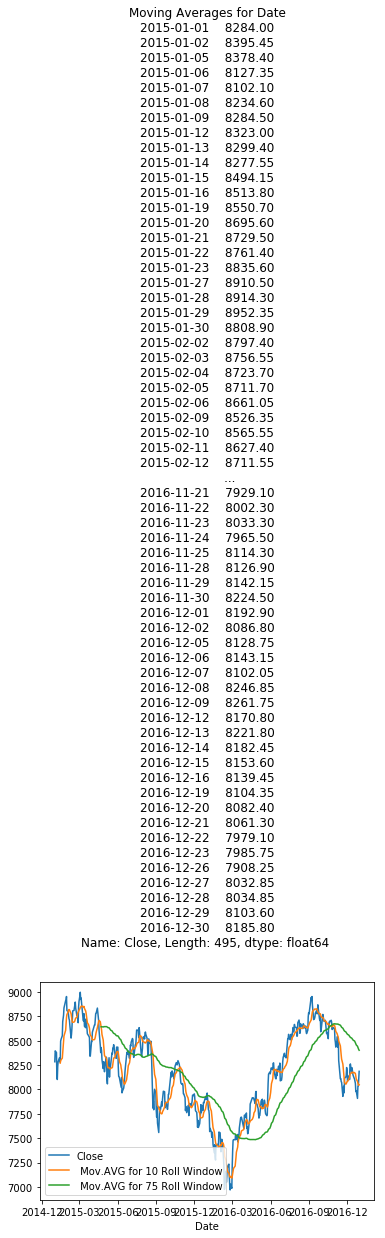

In [45]:
plot_rolling_window(nifty).head()

### 3 Create the dummy time series

#### 3.1 Volume shocks

In [46]:
def vol_shck(dataframe):
    dataframe["next_volume"] = dataframe.Volume.shift(1)
    
    dataframe["volume_shock"] = ((abs(dataframe["next_volume"] - dataframe["Volume"])/dataframe["Volume"]*100)  > 10).astype(int)
    
    return dataframe

In [47]:
vol_shck(nifty).head()

,Open,High,Low,Close,Volume,Turnover,next_volume,volume_shock
Date,,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10,NaN,0
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10,56560411.0,1
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10,101887024.0,1
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10,118160545.0,1
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10,172799618.0,0


In [48]:
def direction(dataframe):
    if any(dataframe["volume_shock"] == 0):
        pass
    else:
        if any((dataframe["next_volume"] - dataframe["Volume"]) < 0):
            return 0
        else:
            return 1
        
        

def vol_shck_direction(dataframe):
    dataframe['VOL_SHOCK_DIR'] = 'Nan'
    dataframe['VOL_SHOCK_DIR'] = dataframe['VOL_SHOCK_DIR'].apply(direction)
    return dataframe

In [ ]:
vol_shck_direction(nifty)

### 3.2 Price shocks

In [51]:
def price_shocks(data):
   
    data["price_t+1"] = data.Close.shift(1)  #next rows value
    
    data["price_shock"] = (abs((data["price_t+1"] - data["Close"])/data["Close"]*100)  > 2).astype(int)
    
    data["price_black_swan"] = data['price_shock'] # Since both had same data anad info/
    
    return data

In [54]:
price_shocks(nifty).head()

,Open,High,Low,Close,Volume,Turnover,next_volume,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan
Date,,,,,,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10,NaN,0,Nan,NaN,0,0
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10,56560411.0,1,Nan,8284.00,0,0
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10,101887024.0,1,Nan,8395.45,0,0
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10,118160545.0,1,Nan,8378.40,1,1
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10,172799618.0,0,Nan,8127.35,0,0


In [55]:
def direction_fun_price(data):
 
    if data["price_shock"] == 0:
        pass
    else:
        if (data["price_t+1"] - data["Close"]) < 0:
            return 0
        else:
            return 1

In [56]:
def price_shock_direction(data):
    data['PRICE_SHOCK_DIR'] = 'Nan'
    data['PRICE_SHOCK_DIR'] = data.apply(direction_fun_price, axis=1)
    return data

In [57]:
price_shock_direction(nifty).head()

,Open,High,Low,Close,Volume,Turnover,next_volume,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,PRICE_SHOCK_DIR
Date,,,,,,,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10,NaN,0,Nan,NaN,0,0,NaN
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10,56560411.0,1,Nan,8284.00,0,0,NaN
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10,101887024.0,1,Nan,8395.45,0,0,NaN
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10,118160545.0,1,Nan,8378.40,1,1,1.0
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10,172799618.0,0,Nan,8127.35,0,0,NaN


### 3.4 Pricing shock without volume shock

In [58]:
def price_shock_wo_vol_shock(data):
    
    data["not_vol_shock"]  = (~(data["volume_shock"].astype(bool))).astype(int)
    data["price_shock_w/0_vol_shock"] = data["not_vol_shock"] & data["price_shock"]
    
    return data

In [59]:
price_shock_wo_vol_shock(nifty).head()

,Open,High,Low,Close,Volume,Turnover,next_volume,volume_shock,VOL_SHOCK_DIR,price_t+1,price_shock,price_black_swan,PRICE_SHOCK_DIR,not_vol_shock,price_shock_w/0_vol_shock
Date,,,,,,,,,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,56560411,2.321880e+10,NaN,0,Nan,NaN,0,0,NaN,1,0
2015-01-02,8288.70,8410.60,8288.70,8395.45,101887024,4.715720e+10,56560411.0,1,Nan,8284.00,0,0,NaN,0,0
2015-01-05,8407.95,8445.60,8363.90,8378.40,118160545,5.525520e+10,101887024.0,1,Nan,8395.45,0,0,NaN,0,0
2015-01-06,8325.30,8327.85,8111.35,8127.35,172799618,8.089190e+10,118160545.0,1,Nan,8378.40,1,1,1.0,0,0
2015-01-07,8118.65,8151.20,8065.45,8102.10,164075424,7.464330e+10,172799618.0,0,Nan,8127.35,0,0,NaN,1,0


# Part 2 :

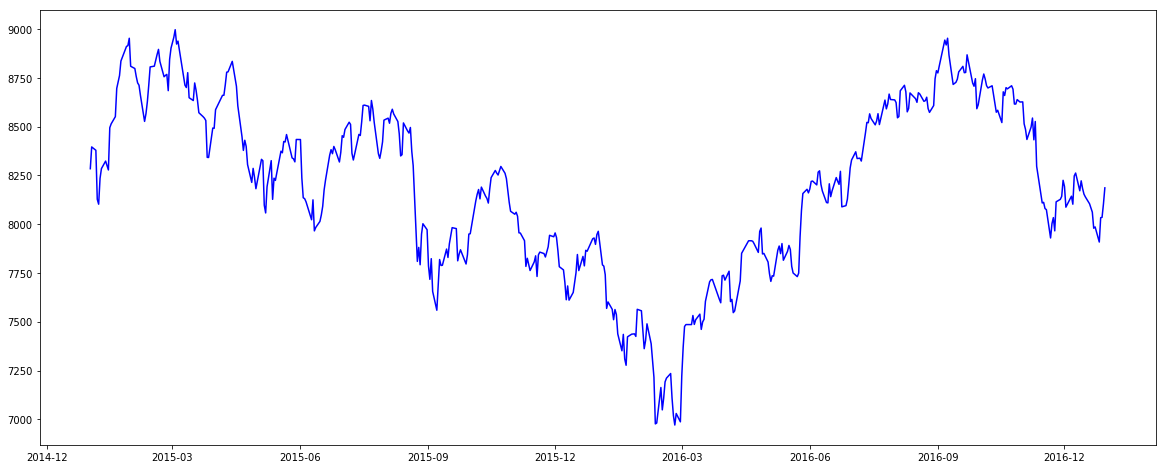

In [60]:
plt.figure(figsize=(20,8))
plt.plot(nifty['Close'],color='blue')

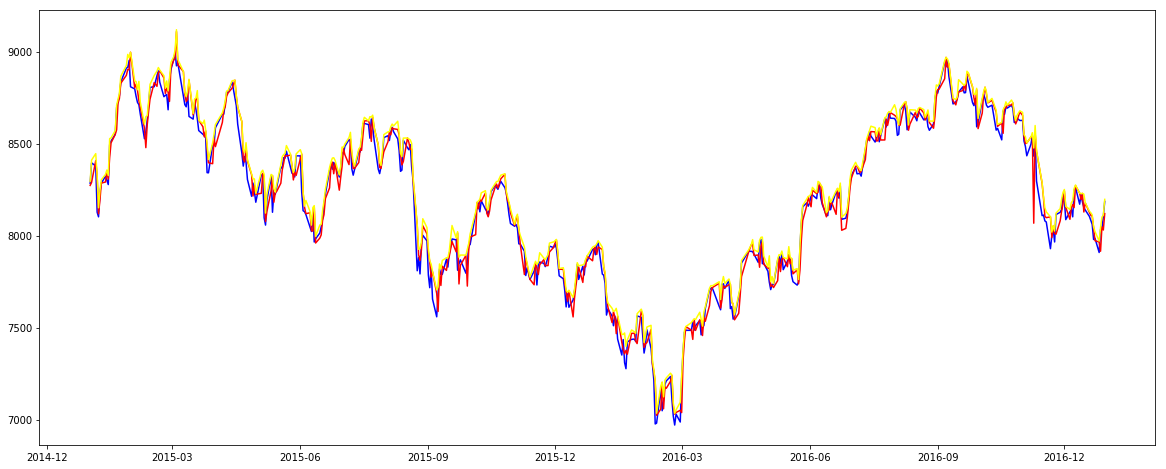

In [61]:
plt.figure(figsize=(20,8))
plt.plot(nifty['Close'],color='blue')
plt.plot(nifty['Open'],color='red')
plt.plot(nifty['High'],color='yellow')

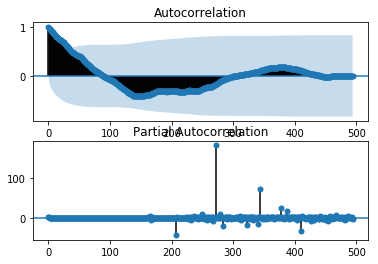

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
series = nifty.Close
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()